In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import *
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.tools.visualization import dag_drawer
from qiskit.extensions.standard import CHGate, HGate, CnotGate, CyGate, CzGate
from qiskit.circuit import Measure
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit.circuit.classicalregister import ClassicalRegister
import itertools

q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q)
circ.h([q[2],q[1]])
circ.x([q[2],q[0]])
circ.y(q[3])
circ.cx(q[0], q[1])
circ.cy(q[2], q[3])
circ.cz(q[1], q[2])
circ.x(q[2])
# circ.barrier()
# circ.measure(q,c)
circ.draw()

dag = circuit_to_dag(circ)
print('%d connected components' % circ.num_connected_components())
# dag_drawer(dag)

1 connected components


adding edge from cy(source_node) to measure(meas_node)
removing edge from cy(source_node) to cz(dest_node)
adding edge from cut_c[0] to measure
adding edge from measure to cut_c[0]
adding edge from measure to q[2]
removing edge from x to q[2]
removing edge from cut_c[0] to cut_c[0]
adding edge from cut_q[0] to cz
adding edge from x to cut_q[0]
removing edge from cut_q[0] to cut_q[0]


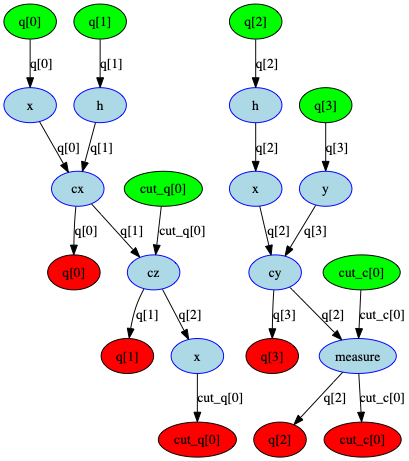

In [2]:
for node in dag.op_nodes():
    if node.name == 'cy':
        source_node = node
    if node.name == 'cz':
        dest_node = node
dag.insert_measure(op=Measure(),qarg=q[2],source_node=source_node, dest_node=dest_node)
dag_drawer(dag)

ClassicalRegister(1, 'c')
QuantumRegister(1, 'q')
q[0] in
q[0] out
Clbit(ClassicalRegister(1, 'c'), 0)


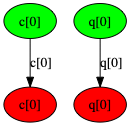

In [18]:
test_dag = DAGCircuit()
c = ClassicalRegister(1, 'c')
q = QuantumRegister(1, 'q')
print(c)
print(q)
test_dag.add_creg(c)
test_dag.add_qreg(q)
c_reg_out_node = test_dag._id_to_node[test_dag._max_node_id]
c_reg_in_node = test_dag._id_to_node[test_dag._max_node_id-1]
print(c_reg_in_node.name, c_reg_in_node.type)
print(c_reg_out_node.name, c_reg_out_node.type)
print(c[0])
dag_drawer(test_dag)